<a href="https://colab.research.google.com/github/sasha-sednev/lab1/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №3**

ФИО: Седнев Александр Юрьевич

Группа: БИВТ-22-СП-2


Что необходимо сделать:

Обучить различного рода модели машинного обучения и сравнить их между собой

**1. Пример импорта данных. Грузим данные**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_to_dataset = "Application_Data.csv"
data = pd.read_csv(path_to_dataset, sep=',')
data = data[:-1]

**2. Понимаем, какая перед нами задача**

In [4]:
data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


Это задача **бинарной классификации**, так как целевая переменная может принимать только два значения: 0 или 1

**3. Предобработка данных**

Отделю целевую переменную, потому что ее не нужно нормировать

In [5]:
y = data['Status']
data.drop(['Status'], axis=1, inplace=True)
X = data

print(X.head(5))
print()
print(y.head(5))

   Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0       5008806          M                1             1               0   
1       5008808          F                0             1               0   
2       5008809          F                0             1               0   
3       5008810          F                0             1               0   
4       5008811          F                0             1               0   

   Total_Income                                        Income_Type  \
0        112500  Working                                       ...   
1        270000  Commercial associate                          ...   
2        270000  Commercial associate                          ...   
3        270000  Commercial associate                          ...   
4        270000  Commercial associate                          ...   

                                      Education_Type  \
0  Secondary / secondary special                 ...   
1  S

Выполню проверку на пропуски

In [7]:
print(X.isnull().sum())
print()
print(X.dtypes)
print()
print()
print(y.isnull().sum())
print(y.dtypes)

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
dtype: int64

Applicant_ID             int64
Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
T

Пропусков нет


In [6]:
print(X.isnull().sum())

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
dtype: int64


In [7]:
X.head(1)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30


Пропусков нет

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


Нормирую численные переменные

In [9]:
numeric_columns = X.select_dtypes(include=['int64']).columns


scaler_standard = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numeric_columns] = scaler_standard.fit_transform(data[numeric_columns])


scaler_minmax = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[numeric_columns] = scaler_minmax.fit_transform(data[numeric_columns])

print("StandardScaler result:")
print(data_standard_scaled[numeric_columns].head(5))
print()
print("\nMinMaxScaler result:")
print(data_minmax_scaled[numeric_columns].head(5))

StandardScaler result:
   Applicant_ID  Owned_Car  Owned_Realty  Total_Children  Total_Income  \
0     -1.669633   1.179117      0.725829       -0.667809     -0.787747   
1     -1.669585  -0.848093      0.725829       -0.667809      0.719126   
2     -1.669561  -0.848093      0.725829       -0.667809      0.719126   
3     -1.669537  -0.848093      0.725829       -0.667809      0.719126   
4     -1.669513  -0.848093      0.725829       -0.667809      0.719126   

   Owned_Mobile_Phone  Owned_Work_Phone  Owned_Phone  Owned_Email  \
0                 0.0         -0.613981    -0.643376    -0.334607   
1                 0.0         -0.613981     1.554301     2.988582   
2                 0.0         -0.613981     1.554301     2.988582   
3                 0.0         -0.613981     1.554301     2.988582   
4                 0.0         -0.613981     1.554301     2.988582   

   Total_Family_Members  Applicant_Age  Years_of_Working  Total_Bad_Debt  \
0             -0.313629       1.884852   

Кодирую категориальные переменные

In [10]:
categorical_columns = X.select_dtypes(include=['object']).columns

label_encoded_data = X.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    label_encoded_data[col] = le.fit_transform(label_encoded_data[col].astype(str))
    label_encoders[col] = le
print(label_encoded_data.head(5))
X = label_encoded_data

   Applicant_ID  Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0       5008806                 1          1             1               0   
1       5008808                 0          0             1               0   
2       5008809                 0          0             1               0   
3       5008810                 0          0             1               0   
4       5008811                 0          0             1               0   

   Total_Income  Income_Type  Education_Type  Family_Status  Housing_Type  \
0        112500            4               4              1             1   
1        270000            0               4              3             1   
2        270000            0               4              3             1   
3        270000            0               4              3             1   
4        270000            0               4              3             1   

   Owned_Mobile_Phone  Owned_Work_Phone  Owned_Phone  Owned_Email  J

**4. Обучить на тренировочном множестве:**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

А.   Линейную модель (LogisticRegression, LinearRegression)

In [12]:
from sklearn.linear_model import LogisticRegression

models = {}

model = LogisticRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print("Коэффициенты модели:", model.coef_)
print("Смещение модели:", model.intercept_)
print("Точность тренировочной модели:", model.score(X_train, y_train))
print("Точность тестовой модели:", model.score(X_test, y_test))

models[model] = model_pred
print()

Коэффициенты модели: [[ 6.69104001e-07 -2.32138589e-02 -9.21180068e-03  5.71308039e-03
   1.85176031e-02 -2.03859187e-06  4.62037055e-02  1.73991634e-03
  -1.69287282e-02  4.31850238e-03  2.22256452e-04  1.24243900e-02
   7.65036603e-03 -4.74884799e-03 -1.96252343e-02  1.76996743e-02
  -8.94973011e-02  1.55088752e-01 -1.42294853e+00  1.85345987e+00]]
Смещение модели: [0.00022231]
Точность тренировочной модели: 0.9978110541764091
Точность тестовой модели: 0.9970155192996418



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


В. Деревянную модель (DecisionTreeClassifier, DecisionTreeRegressor) (тут советую попробовать разные глубины деревьев)

In [13]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth_values = [3, 10, 50]
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    print(model.feature_importances_ )
    print(f'Точность тренировочной модели: {model.score(X_train, y_train)}')
    print(f'Точность тестовой модели: {model.score(X_test, y_test)}', f'\n')
    models[model] = model_pred

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00498448 0.         0.         0.         0.
 0.34219164 0.65282387]
Точность тренировочной модели: 0.998159295557435
Точность тестовой модели: 0.9972144846796658 

[0.         0.         0.01479895 0.         0.         0.00690618
 0.         0.         0.         0.         0.         0.
 0.00863272 0.00322288 0.         0.         0.00141263 0.
 0.35323515 0.61179148]
Точность тренировочной модели: 1.0
Точность тестовой модели: 0.9998010346199762 

[0.00831881 0.         0.01479895 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00322288 0.         0.         0.         0.
 0.34805552 0.62560384]
Точность тренировочной модели: 1.0
Точность тестовой модели: 0.9996020692399522 



C.   K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor) (тут тоже есть смысл попробовать разные k)

In [14]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

n_neighbors = [6, 15, 90]
for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    print(f"Точность тренировочной модели для {k} соседей: " , model.score(X_train, y_train))
    print(f"Точность тестовой модели для {k} соседей: " , model.score(X_test, y_test), f'\n')
    models[model] = model_pred

Точность тренировочной модели для 6 соседей:  0.9955226108153823
Точность тестовой модели для 6 соседей:  0.9950258654994031 

Точность тренировочной модели для 15 соседей:  0.9951743694343566
Точность тестовой модели для 15 соседей:  0.9952248308794269 

Точность тренировочной модели для 90 соседей:  0.9951743694343566
Точность тестовой модели для 90 соседей:  0.9952248308794269 



D.  Случайный лес (RandomForestClassifier, RandomForestRegressor)


In [15]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier(n_estimators=150)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(f'Точность тренировочной модели: {model.score(X_train, y_train)}')
print(f'Точность тестовой модели: {model.score(X_test, y_test)}')
models[model] = model_pred

Точность тренировочной модели: 1.0
Точность тестовой модели: 0.9978113808197374


**5. Посчитайте метрики на train и test множествах**

Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score

Модели: LogisticRegression()
DecisionTreeClassifier(max_depth=3)
DecisionTreeClassifier(max_depth=10)
DecisionTreeClassifier(max_depth=50)
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=90)
RandomForestClassifier(n_estimators=150)

1: Accuracy
LogisticRegression(): 0.9970155192996418
DecisionTreeClassifier(max_depth=3): 0.9972144846796658
DecisionTreeClassifier(max_depth=10): 0.9998010346199762
DecisionTreeClassifier(max_depth=50): 0.9996020692399522
KNeighborsClassifier(n_neighbors=6): 0.9950258654994031
KNeighborsClassifier(n_neighbors=15): 0.9952248308794269
KNeighborsClassifier(n_neighbors=90): 0.9952248308794269
RandomForestClassifier(n_estimators=150): 0.9978113808197374

2: ROC-AUC


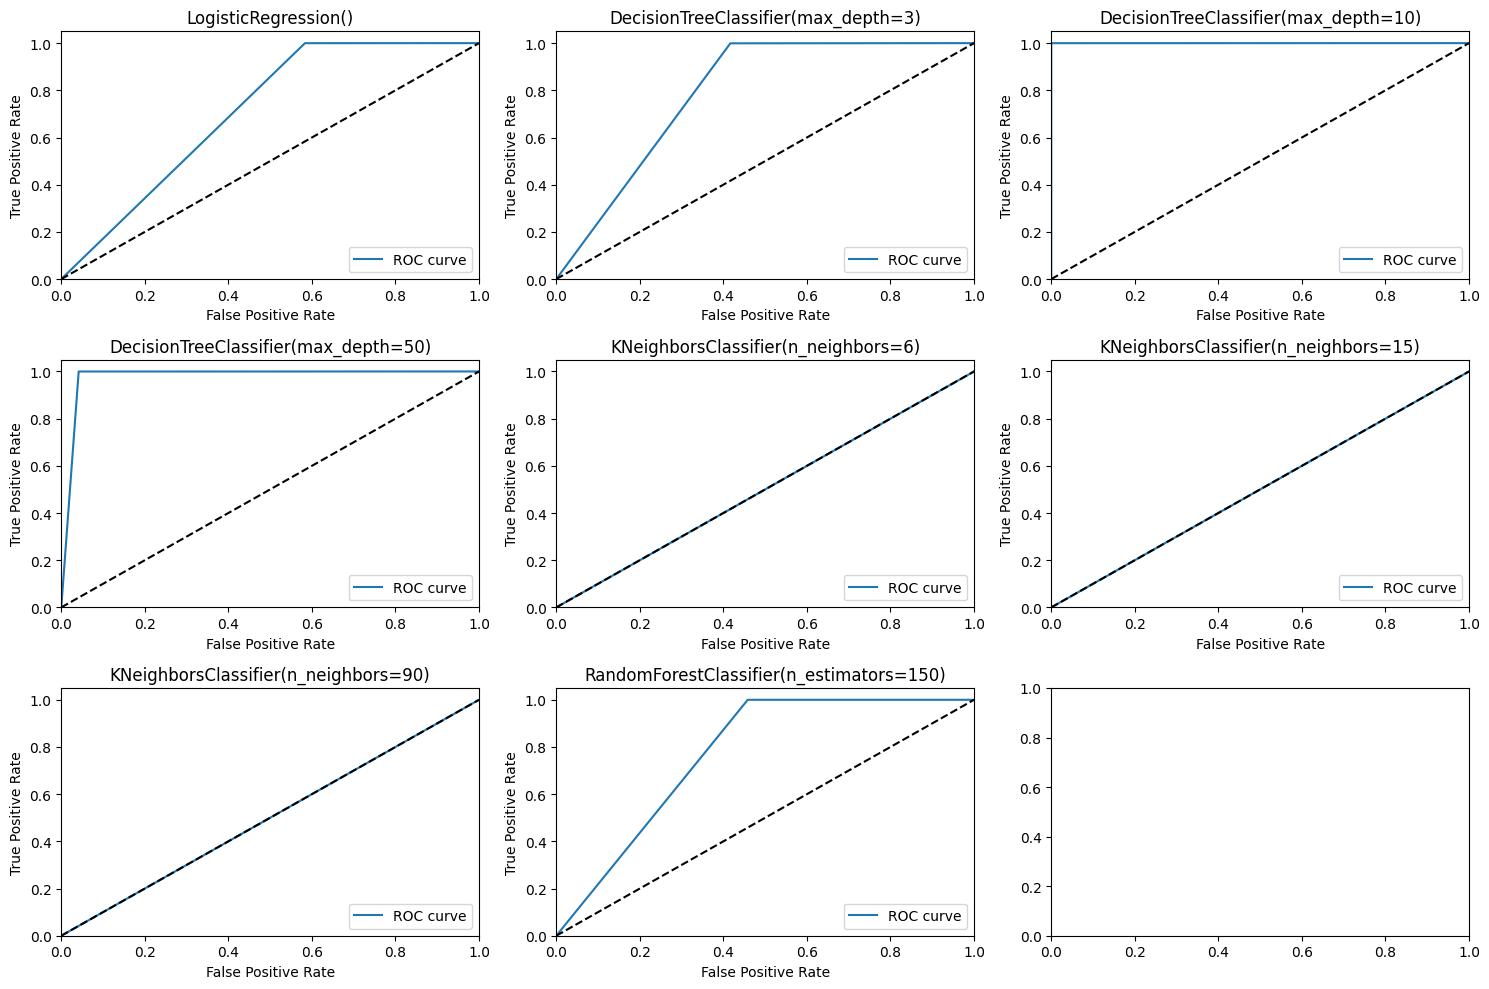


3: PR-кривая


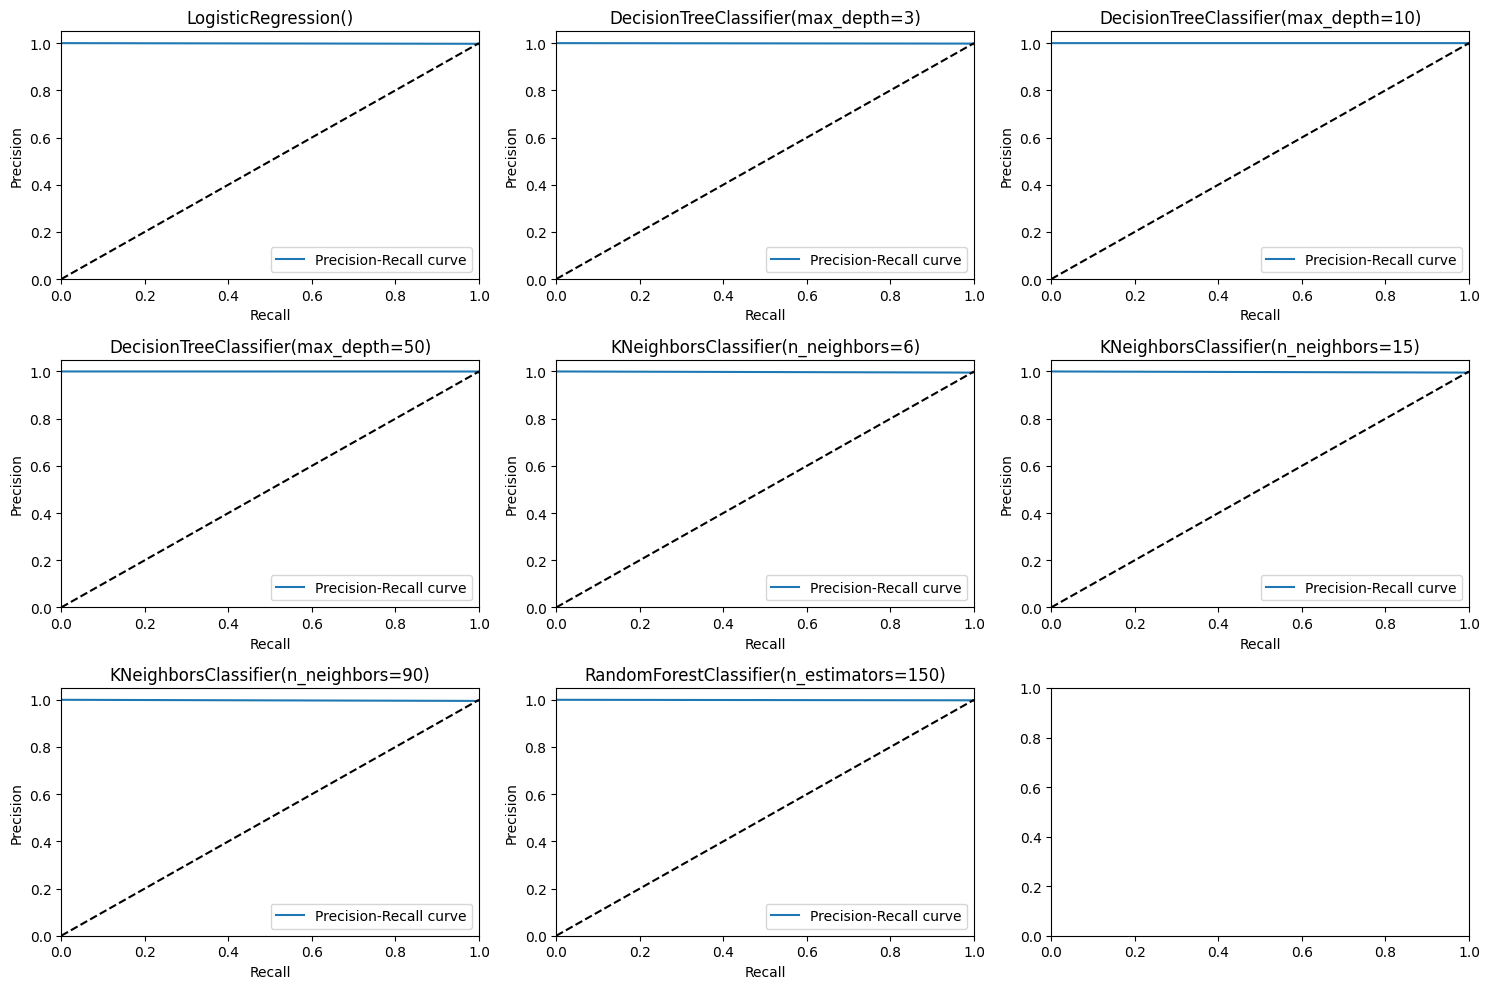


4: F1-score:
LogisticRegression() f1-score: 0.998502545672357
DecisionTreeClassifier(max_depth=3) f1-score: 0.9986013986013986
DecisionTreeClassifier(max_depth=10) f1-score: 0.9999000299910027
DecisionTreeClassifier(max_depth=50) f1-score: 0.9998000799680128
KNeighborsClassifier(n_neighbors=6) f1-score: 0.997506731824075
KNeighborsClassifier(n_neighbors=15) f1-score: 0.9976067012365377
KNeighborsClassifier(n_neighbors=90) f1-score: 0.9976067012365377
RandomForestClassifier(n_estimators=150) f1-score: 0.9989016475287069


In [16]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_recall_curve,
    f1_score,
    roc_curve,
)

print("Модели:", "\n".join([str(model) for model in models.keys()]))

print()
print("1: Accuracy")
for (key, value) in models.items():
    accuracy = accuracy_score(y_test, value)
    print(f"{str(key)}:", accuracy)

print()
print("2: ROC-AUC")
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, (key, value) in enumerate(models.items()):
    roc_auc = roc_auc_score(y_test, value)
    fpr, tpr, _ = roc_curve(y_test, value)

    axes[i].plot(fpr, tpr, label=f'ROC curve')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(str(key))
    axes[i].legend(loc="lower right")



plt.tight_layout()
plt.show()

print()
print("3: PR-кривая")

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, (key, value) in enumerate(models.items()):
    precision, recall, _ = precision_recall_curve(y_test, value)

    axes[i].plot(recall, precision, label=f'Precision-Recall curve')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(str(key))
    axes[i].legend(loc="lower right")

plt.tight_layout()
plt.show()

print()
print("4: F1-score:")

for (key, value) in models.items():
    f1 = f1_score(y_test, value)
    print(f"{key} f1-score:", f1)

**6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:**

1) Какая модель справилась лучше с поставленной задачей?

Модель определю по следующим параметрам:

 ROC-AUC - чем выше значение, тем лучше модель справляется с задачей классификации.

 F1-score - это гармоническое среднее между точностью и полнотой. Высокое значение указывает на хорошую производительность модели.

 Accuracy - это процент правильных предсказаний. Но в случае несбалансированных классов эта метрика может быть обманчивой.

Accuracy:

DecisionTreeClassifier(max_depth=3): 1.0

DecisionTreeClassifier(max_depth=10): 1.0

DecisionTreeClassifier(max_depth=50): 1.0

RandomForestClassifier(n_estimators=150): 1.0

ROC-AUC:

DecisionTreeClassifier(max_depth=3): 1.0

DecisionTreeClassifier(max_depth=10): 1.0

DecisionTreeClassifier(max_depth=50): 1.0

RandomForestClassifier(n_estimators=150): 1.0

F1-score:

DecisionTreeClassifier(max_depth=3): 1.0

DecisionTreeClassifier(max_depth=10): 1.0

DecisionTreeClassifier(max_depth=50): 1.0

RandomForestClassifier(n_estimators=150): 1.0


**Таким образом**, лучше всего справились две модели: DecisionTreeClassifier и RandomForestClassifier

2)Имеет ли место переобучение?

Если модель на тренировочном наборе показывает результаты, значительно превосходящие тестовый набор (различия более 0.1), то это может указывать на переобучение.

В моем случае таких моделей **нет**.

3) Имеет ли место недообучение?

Если модель показывает низкие результаты как на тренировочном, так и на тестовом наборах данных, то она считается недообученной.

В моем случае абсолютно все модели показывают результаты не ниже 0,83. Так что таких моделей нет.

4) Как можно улучшить метрики моделей?

- Увеличить объем данных, чтобы модель не могла "запомнить" все данные.
- Отобрать признаки, то есть убрать нерелевантные или избыточные данные.